### Importing libraries

In [14]:
from keras.layers import Dense,Flatten,Reshape
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

### Data loading and preprocessing

In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape([-1,28,28,1]).astype('float32') / 255
x_test = x_test.reshape([-1,28,28,1]).astype('float32') / 255

### Autoencoder Model

In [46]:
encoding_dim = 15
encoder = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(encoding_dim,activation='relu')
])
decoder = Sequential([
    Dense(28*28,activation='sigmoid',input_shape = (encoding_dim,)),
    Reshape((28,28,1))
])
autoencoder = Sequential([
    encoder,
    decoder
])

### Model compilation and training

In [19]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
autoencoder.fit(x_train, x_train,epochs=10,batch_size=256,validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0833 - accuracy: 0.7802 - val_loss: 0.0528 - val_accuracy: 0.7979
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0444 - accuracy: 0.7994 - val_loss: 0.0389 - val_accuracy: 0.8009
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0362 - accuracy: 0.8028 - val_loss: 0.0332 - val_accuracy: 0.8036
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0319 - accuracy: 0.8049 - val_loss: 0.0300 - val_accuracy: 0.8055
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0293 - accuracy: 0.8061 - val_loss: 0.0281 - val_accuracy: 0.8061
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0278 - accuracy: 0.8068 - val_loss: 0.0270 - val_accuracy: 0.8066
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0269 - accuracy: 0.8073 - val_loss: 0.0262 - val_accuracy: 0.8068
Epoch 

### Displaying original and reconstructed images

313/313 [==============================] - 1s 2ms/step


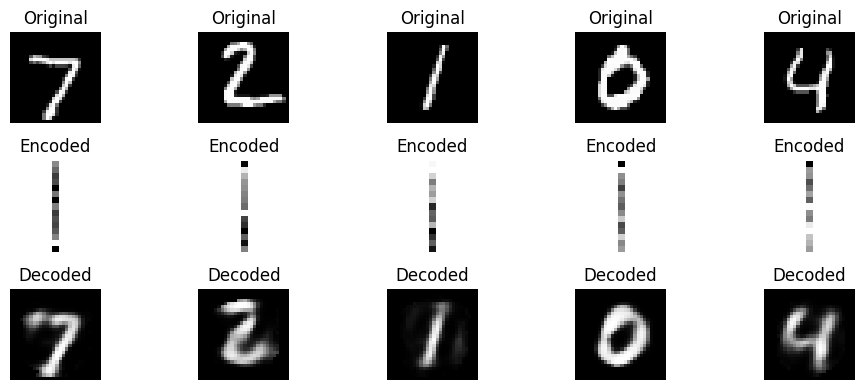

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming x_test, encoded_img, and decoded_img are available
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(10, 4))
n = 5
for i in range(n):
    # Original Images
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.axis('off')
    
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_img[i].reshape(encoding_dim,1))
    plt.axis('off')
    
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.axis('off')

plt.tight_layout()
plt.show()
